In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from string import punctuation
from string import digits
from nltk.corpus import wordnet
from sklearn.feature_extraction import text, stop_words
from sklearn.cluster import KMeans
import time
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn import preprocessing

#random
np.random.seed(42)
import random
random.seed(42)

# Only take a specific selection (8) of the 20 available categories
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

# Load a training & test data sets consisting of those 8 categories
full_dataset = fetch_20newsgroups(subset = 'all', categories = categories, shuffle = True, random_state = 0)

print("\n\n" + '-'*40 + "\n\n")


#############################################
#### Define Class data set arrys (0 or 1) ###
#############################################
# Categorize the 8 news categories into two (binary) Classes 
# 0 = computer technology
# 1 = recreational activity
full_data_class = [] 

# Categories are mapped 0-7, (0-3) = Comp, (4-7) = Recreation
print(full_dataset.target_names)
print(full_dataset.target)

for category in full_dataset.target:
    if category < 4:
        full_data_class.append(0)
    else:
        full_data_class.append(1)
        
        
# Sanity Checks, values should all be either 1 or 0
print("First 10 articles Classification (Train): \n" + str(full_data_class[0:10]))
# This will be used for the classification categories only!!!!
# Each data point refers to the classification of a single article in dataset

full_count_vectorizer = CountVectorizer(min_df=3, stop_words='english')
full_doc_term_matrix = full_count_vectorizer.fit_transform(full_dataset.data)

print(full_count_vectorizer)
print("\n\n" + '-'*40 + "\n\n")

# Start TD-DIF Transform process
tfidf_transformer = TfidfTransformer()
full_tfidf = tfidf_transformer.fit_transform(full_doc_term_matrix)

print("Number of articles within the FULL Dataset: " + str(len(full_dataset.filenames)))
print("Number of Features (unique words) in FULL dataset (After Processing): "+ str(len(full_count_vectorizer.get_feature_names())))
print("Shape of FULL document-count-matrix: " + str(full_doc_term_matrix.shape))
print("Shape of FULL TF-IDF Matrix: " + str(full_tfidf.shape))


C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)




----------------------------------------


['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
[6 4 1 ... 0 4 6]
First 10 articles Classification (Train): 
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


----------------------------------------


Number of articles within the FULL Dataset: 7882
Number of Features (unique words) in FULL dataset (After Processing): 27768
Shape of FULL document-count-matrix: (7882, 27768)
Shape of FULL TF-IDF Matrix: (7882, 27768)


n_components=1
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.159s

n_components=2
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.219s

n_components=3
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.352s

n_components=5
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.261s



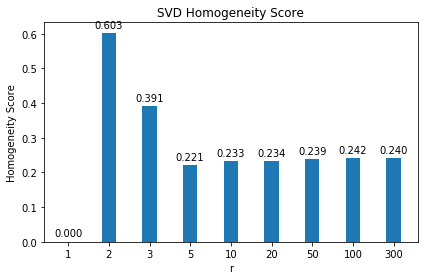

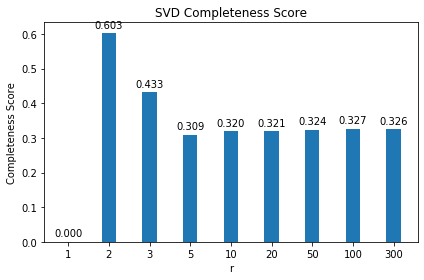

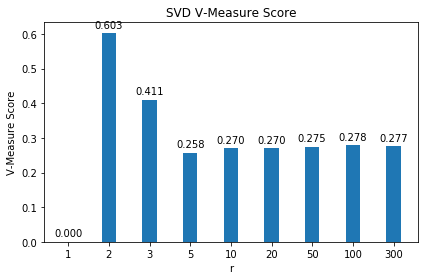

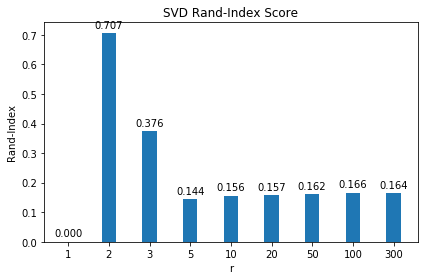

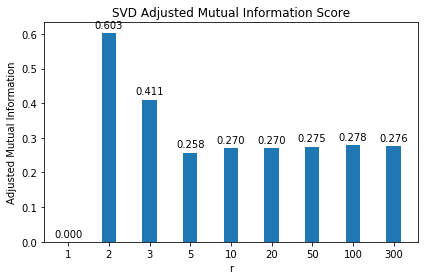

In [3]:
#question 5

SVD_homogeneity = []
SVD_completeness = []
SVD_vmeasure = []
SVD_adjusted_rand = []
SVD_adjusted_mutual = []

km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)


r_set = [1, 2, 3, 5, 10, 20, 50, 100, 300]
for r in r_set:
    print("n_components=" + str(r))
    svd = TruncatedSVD(n_components=r)
    SVD_full_tfidf = svd.fit_transform(full_tfidf)
    print("Clustering sparse data with %s" % km)
    t0 = time.time()
    km.fit(SVD_full_tfidf)
    print("done in %0.3fs" % (time.time() - t0))
    print()

    SVD_homogeneity.append(metrics.homogeneity_score(full_data_class, km.labels_))
    SVD_completeness.append(metrics.completeness_score(full_data_class, km.labels_))
    SVD_vmeasure.append(metrics.v_measure_score(full_data_class, km.labels_))
    SVD_adjusted_rand.append(metrics.adjusted_rand_score(full_data_class, km.labels_))
    SVD_adjusted_mutual.append(metrics.adjusted_mutual_info_score(full_data_class, km.labels_))

#plot each one

        
def plot_r_plot_score(y_values_vector, r_set_values, plot_y_label, plot_title):
    
    labels = r_set_values
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, y_values_vector, width)
        
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(plot_y_label)
    ax.set_title(plot_title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('r')
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
    autolabel(rects1)
    fig.tight_layout()

    plt.show()
    
plot_r_plot_score(SVD_homogeneity, r_set, 'Homogeneity Score', 'SVD Homogeneity Score')
plot_r_plot_score(SVD_completeness, r_set, 'Completeness Score', 'SVD Completeness Score')
plot_r_plot_score(SVD_vmeasure, r_set, 'V-Measure Score', 'SVD V-Measure Score')
plot_r_plot_score(SVD_adjusted_rand, r_set, 'Rand-Index', 'SVD Rand-Index Score')
plot_r_plot_score(SVD_adjusted_mutual, r_set, 'Adjusted Mutual Information', 'SVD Adjusted Mutual Information Score')

    ## do SVD, NMF and run k means clustering on each. record the values. separating SVD and NMF sections due to compute time

n_components=1
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.135s

n_components=2
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.110s

n_components=3
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.107s

n_components=5
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.170s



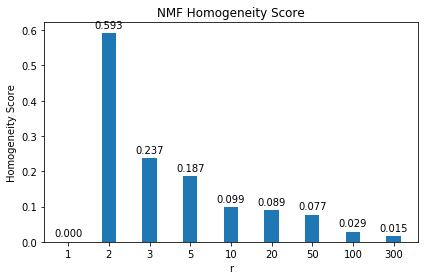

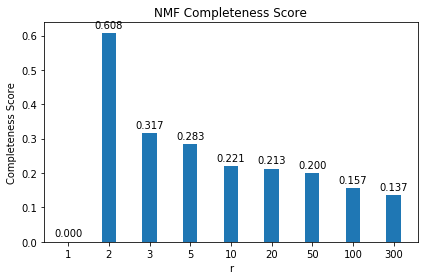

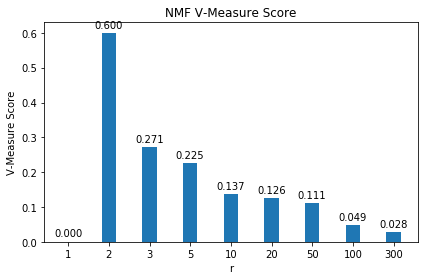

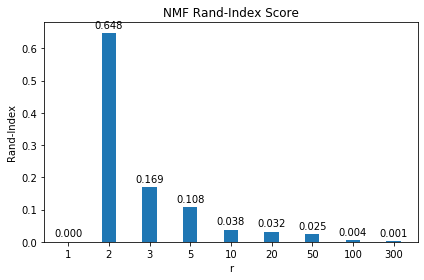

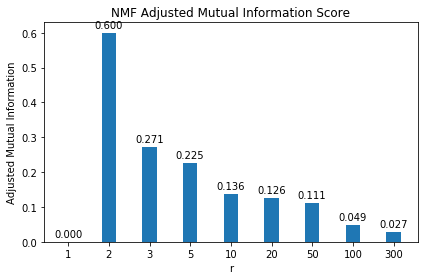

In [4]:
#question 5 continued

from sklearn.decomposition import NMF
NMF_homogeneity = []
NMF_completeness = []
NMF_vmeasure = []
NMF_adjusted_rand = []
NMF_adjusted_mutual = []
r_set = [1, 2, 3, 5, 10, 20, 50, 100, 300]

for r in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
    print("n_components=" + str(r))
    #NMF reduction
    nmf_settings = NMF(n_components=r, init='random', random_state=0)
    reduced_full_nmf_matrix = nmf_settings.fit_transform(full_tfidf)
    nmf_settings_components = nmf_settings.components_
    #kmeans
    print("Clustering sparse data with %s" % km)
    t0 = time.time()
    km.fit(reduced_full_nmf_matrix)
    print("done in %0.3fs" % (time.time() - t0))
    print()

    NMF_homogeneity.append(metrics.homogeneity_score(full_data_class, km.labels_))
    NMF_completeness.append(metrics.completeness_score(full_data_class, km.labels_))
    NMF_vmeasure.append(metrics.v_measure_score(full_data_class, km.labels_))
    NMF_adjusted_rand.append(metrics.adjusted_rand_score(full_data_class, km.labels_))
    NMF_adjusted_mutual.append(metrics.adjusted_mutual_info_score(full_data_class, km.labels_))
    
plot_r_plot_score(NMF_homogeneity, r_set, 'Homogeneity Score', 'NMF Homogeneity Score')
plot_r_plot_score(NMF_completeness, r_set, 'Completeness Score', 'NMF Completeness Score')
plot_r_plot_score(NMF_vmeasure, r_set, 'V-Measure Score', 'NMF V-Measure Score')
plot_r_plot_score(NMF_adjusted_rand, r_set, 'Rand-Index', 'NMF Rand-Index Score')
plot_r_plot_score(NMF_adjusted_mutual, r_set, 'Adjusted Mutual Information', 'NMF Adjusted Mutual Information Score')